In [1]:
#Import the necessary package to read the file and suppress the warnings
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data from CSV file
housingdf = pd.read_csv("https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv")
housingdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#We have identified that in total 1460 rowsand 81 columns exist in the dataframe
print(housingdf.shape)

(1460, 81)


In [4]:
#identify the data-types for each attributes
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Identify the columns which has the null values
for column in housingdf.columns:
    print(column+"  "+str(housingdf[column].isnull().sum()))

Id  0
MSSubClass  0
MSZoning  0
LotFrontage  259
LotArea  0
Street  0
Alley  1369
LotShape  0
LandContour  0
Utilities  0
LotConfig  0
LandSlope  0
Neighborhood  0
Condition1  0
Condition2  0
BldgType  0
HouseStyle  0
OverallQual  0
OverallCond  0
YearBuilt  0
YearRemodAdd  0
RoofStyle  0
RoofMatl  0
Exterior1st  0
Exterior2nd  0
MasVnrType  8
MasVnrArea  8
ExterQual  0
ExterCond  0
Foundation  0
BsmtQual  37
BsmtCond  37
BsmtExposure  38
BsmtFinType1  37
BsmtFinSF1  0
BsmtFinType2  38
BsmtFinSF2  0
BsmtUnfSF  0
TotalBsmtSF  0
Heating  0
HeatingQC  0
CentralAir  0
Electrical  1
1stFlrSF  0
2ndFlrSF  0
LowQualFinSF  0
GrLivArea  0
BsmtFullBath  0
BsmtHalfBath  0
FullBath  0
HalfBath  0
BedroomAbvGr  0
KitchenAbvGr  0
KitchenQual  0
TotRmsAbvGrd  0
Functional  0
Fireplaces  0
FireplaceQu  690
GarageType  81
GarageYrBlt  81
GarageFinish  81
GarageCars  0
GarageArea  0
GarageQual  81
GarageCond  81
PavedDrive  0
WoodDeckSF  0
OpenPorchSF  0
EnclosedPorch  0
3SsnPorch  0
ScreenPorch  0
Pool

In [6]:
# Identify the columns which has the null values and display first 20
findNullvalues=round(housingdf.isnull().sum()/len(housingdf.index)*100,2).sort_values(ascending=False)
findNullvalues.head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

In [7]:
# Drop the columns which has more than 80% of rows are null value
for column in housingdf.columns:
    if round(100 * (housingdf[column].isnull().sum()/len(housingdf[column].index)), 2) > 80:
        housingdf.drop(column,axis=1,inplace = True)

In [8]:
# Identify the shape after dropping the columns
housingdf.shape

(1460, 77)

In [9]:
housingdf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


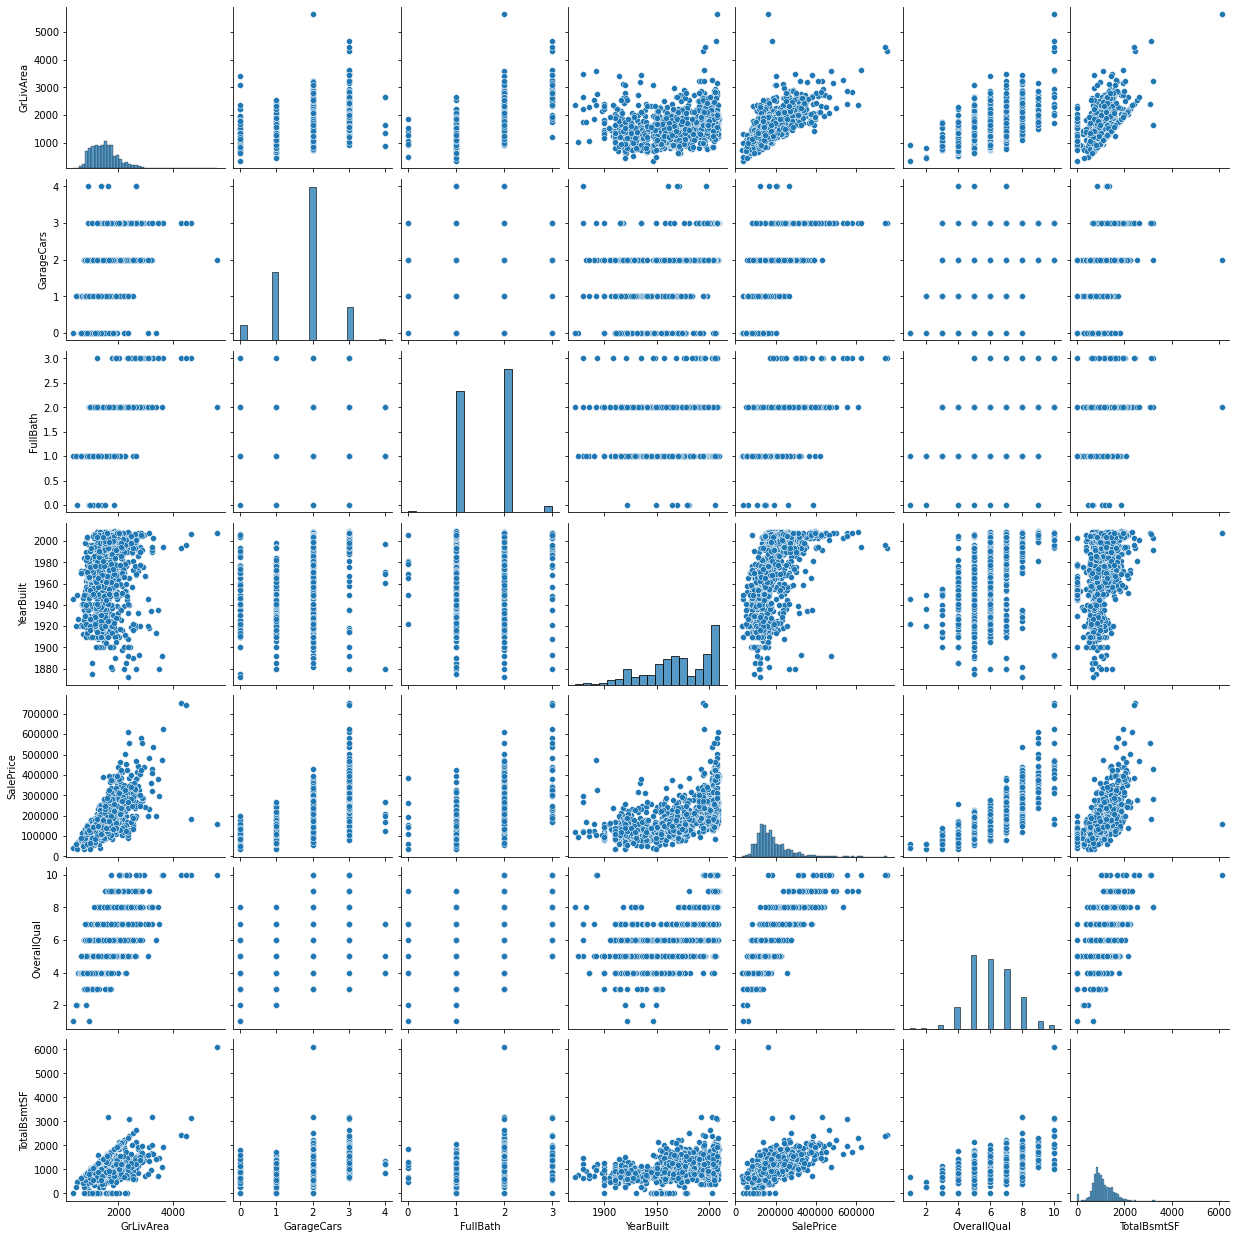

In [10]:
# Pair plot to see the pattern
import matplotlib.pyplot as plt
import seaborn as sns

cols = [ 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt','SalePrice', 'OverallQual', 'TotalBsmtSF']
sns.pairplot(housingdf[cols])
plt.show()

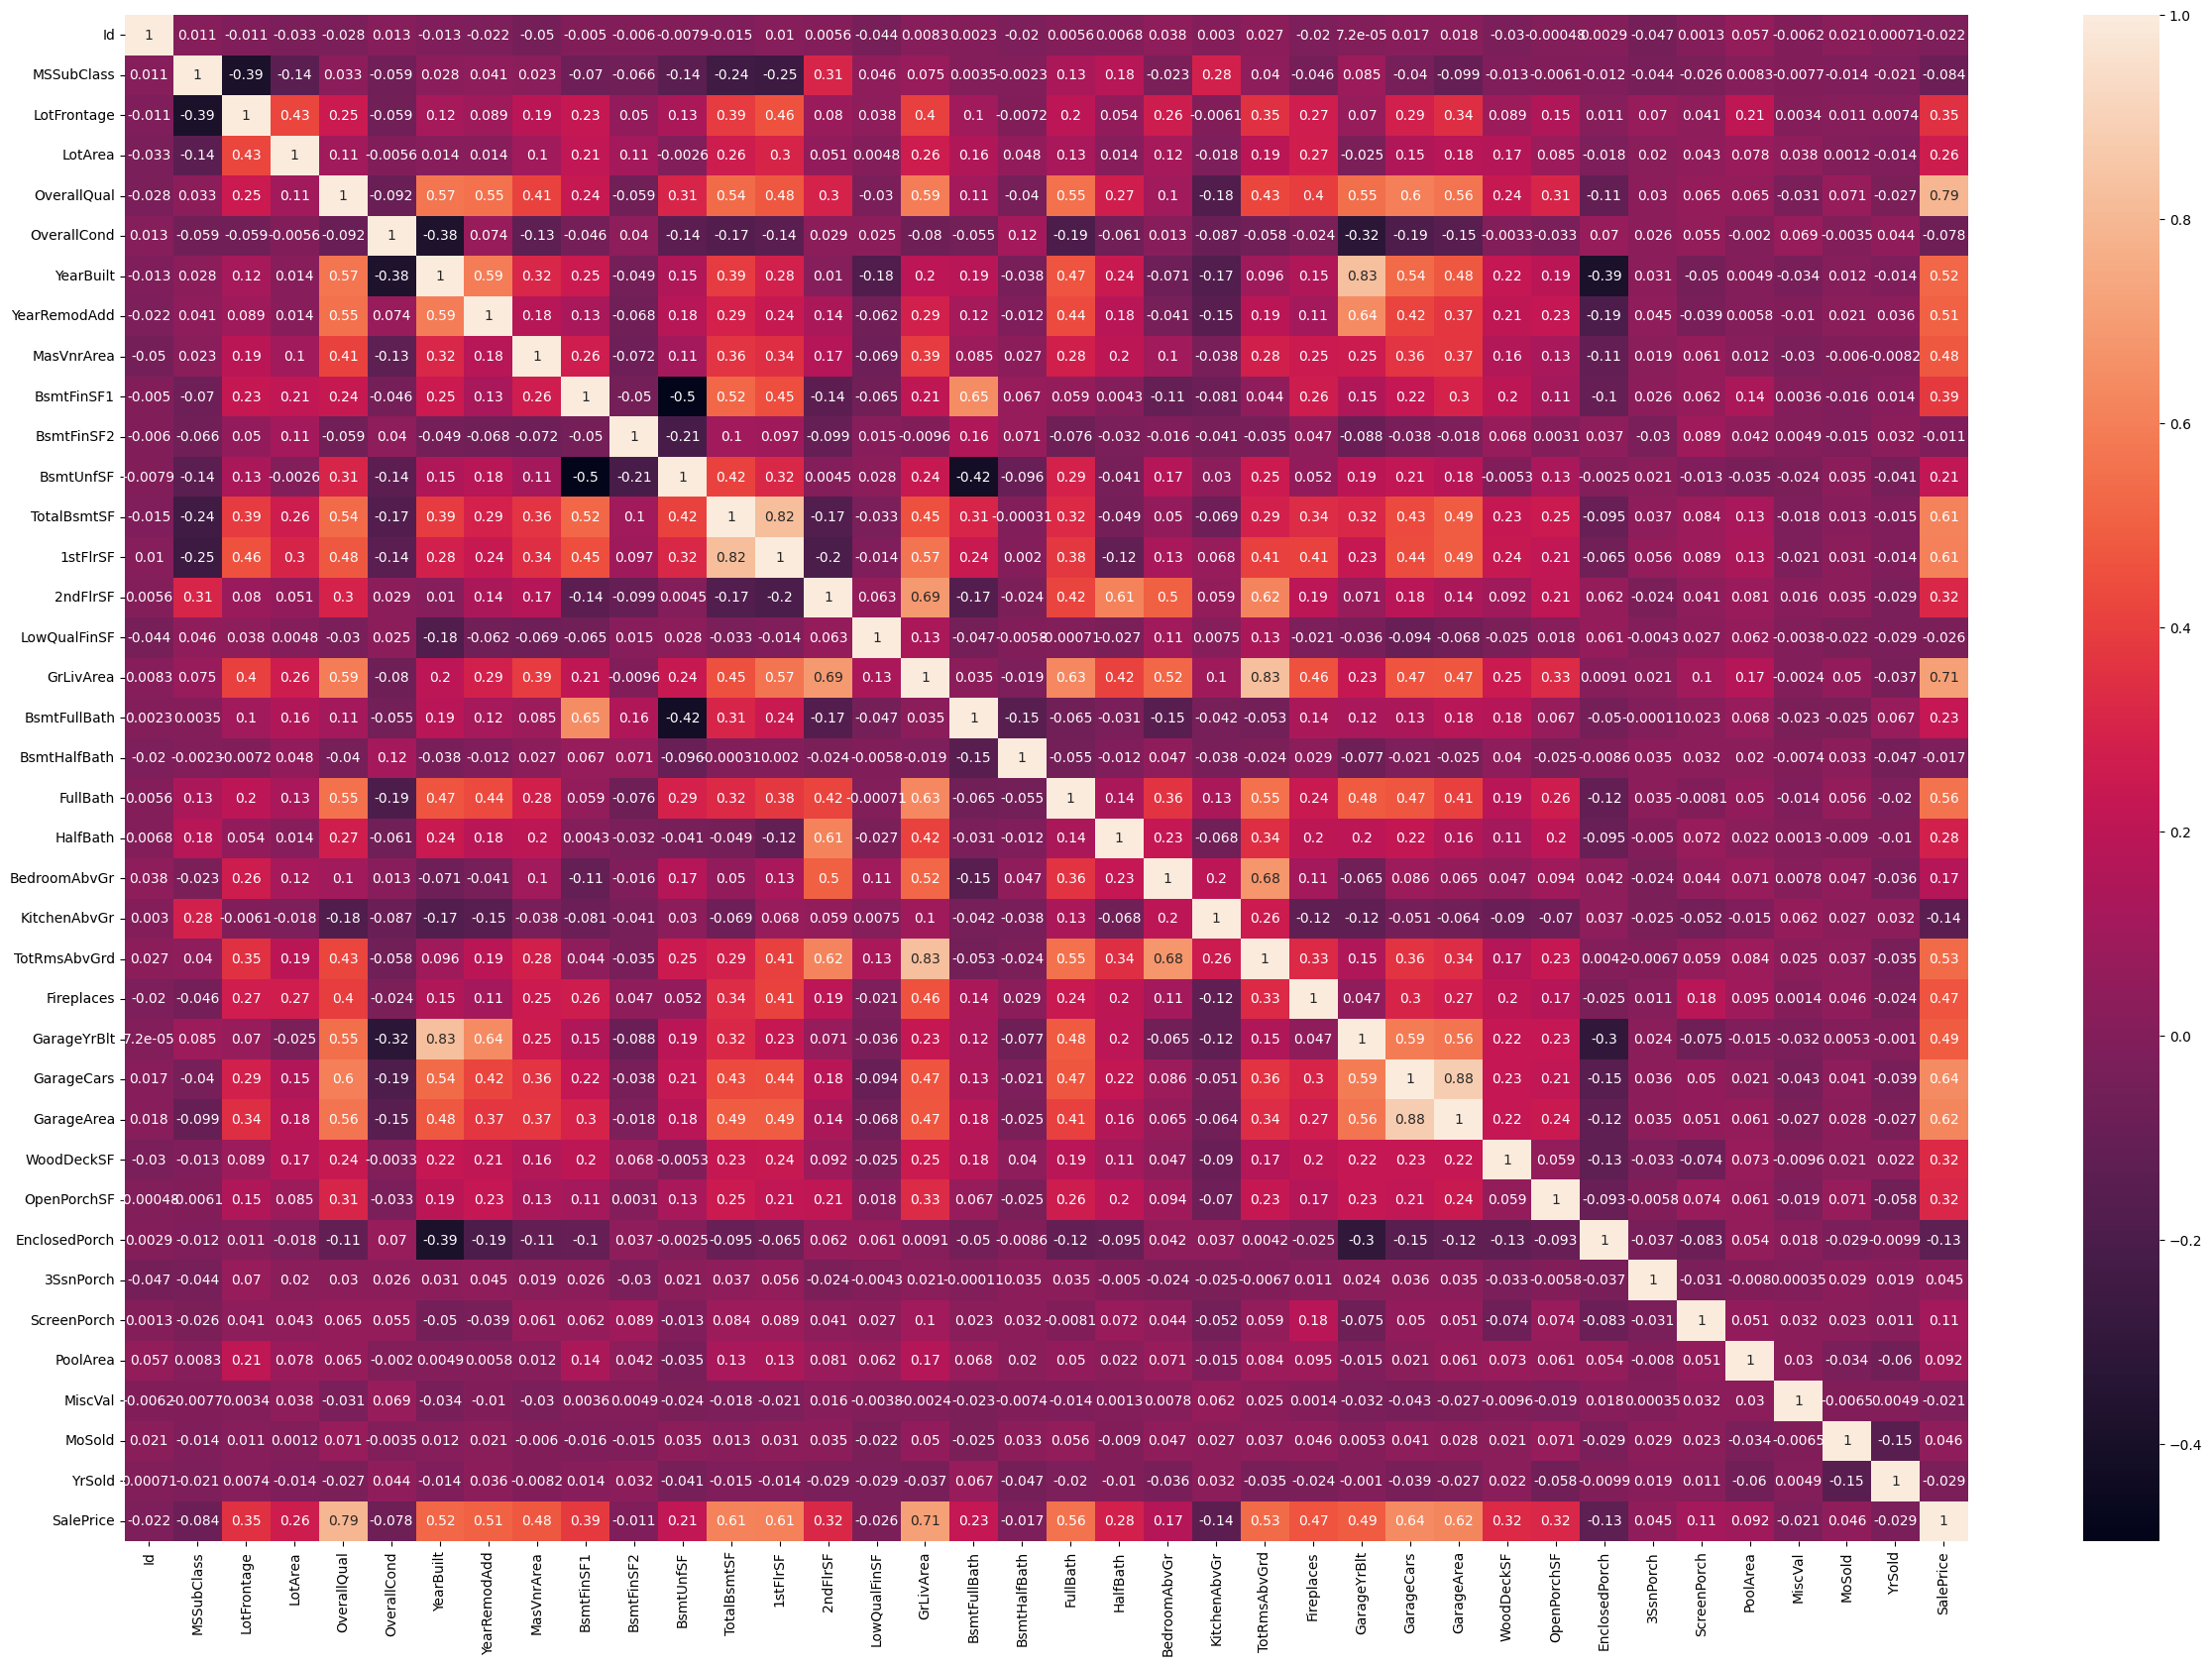

In [11]:
# Heat map to see the identify the correlation on sales-price
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(housingdf.corr(), annot=True)
plt.show()

In [12]:
##Observations:
#01. 1stfloor area and bsmt area, garage area, total rooms and living area(Positive)
#02. unfinished and finished basement area, bsmt full bathrooms have a negative correlation

<AxesSubplot:xlabel='GarageYrBlt', ylabel='count'>

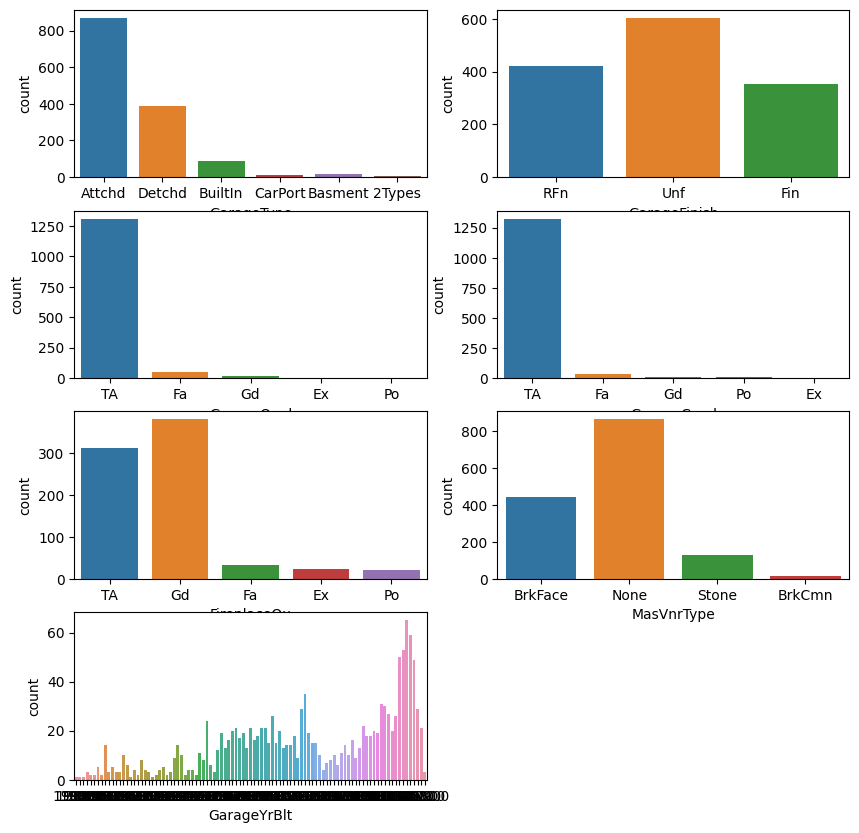

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.countplot(housingdf["GarageType"])
plt.subplot(4,2,2)
sns.countplot(housingdf["GarageFinish"])
plt.subplot(4,2,3)
sns.countplot(housingdf["GarageQual"])
plt.subplot(4,2,4)
sns.countplot(housingdf["GarageCond"])
plt.subplot(4,2,5)
sns.countplot(housingdf["FireplaceQu"])
plt.subplot(4,2,6)
sns.countplot(housingdf["MasVnrType"])
plt.subplot(4,2,7)
sns.countplot(housingdf["GarageYrBlt"])

<AxesSubplot:xlabel='3SsnPorch', ylabel='count'>

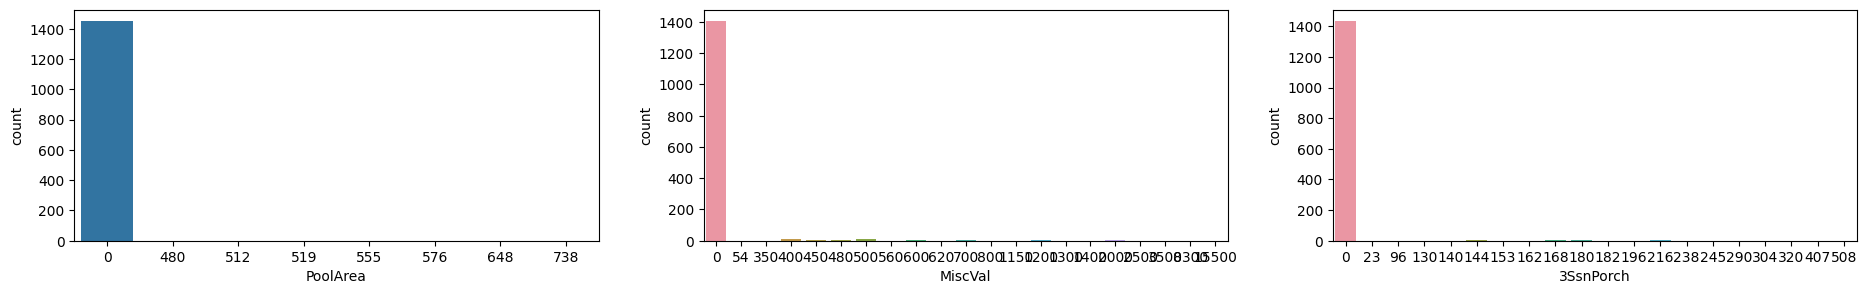

In [14]:
plt.figure(figsize=(23,3))
plt.subplot(1,3,1)
sns.countplot(housingdf["PoolArea"])
plt.subplot(1,3,2)
sns.countplot(housingdf["MiscVal"])
plt.subplot(1,3,3)
sns.countplot(housingdf["3SsnPorch"])

In [15]:
housingdf["MasVnrArea"].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

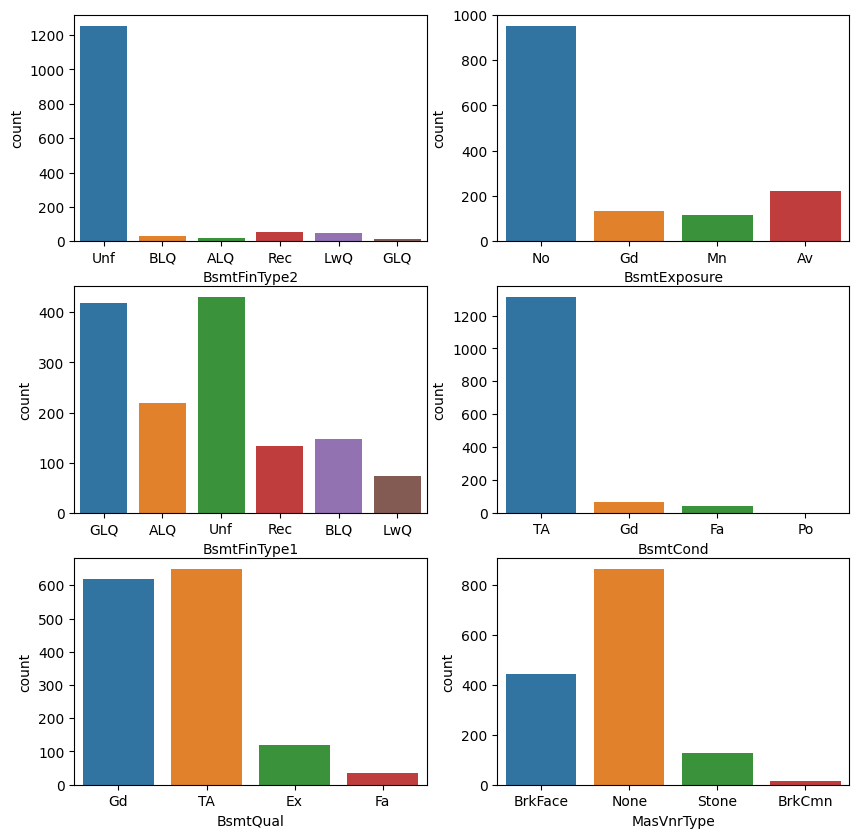

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.countplot(housingdf["BsmtFinType2"])
plt.subplot(3,2,2)
sns.countplot(housingdf["BsmtExposure"])
plt.subplot(3,2,3)
sns.countplot(housingdf["BsmtFinType1"])
plt.subplot(3,2,4)
sns.countplot(housingdf["BsmtCond"])
plt.subplot(3,2,5)
sns.countplot(housingdf["BsmtQual"])
plt.subplot(3,2,6)
sns.countplot(housingdf["MasVnrType"])

<AxesSubplot:xlabel='Electrical', ylabel='count'>

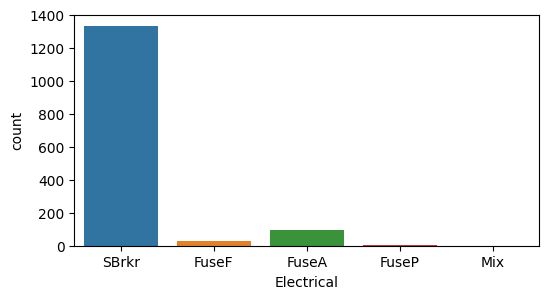

In [17]:
plt.figure(figsize=(6,3))
sns.countplot(housingdf["Electrical"])

In [18]:
housingdf["GarageType"] = housingdf["GarageType"].fillna("Attchd")
housingdf["GarageFinish"] = housingdf["GarageFinish"].fillna("Unf")
housingdf["GarageQual"] = housingdf["GarageQual"].fillna("TA")
housingdf["GarageCond"] = housingdf["GarageCond"].fillna("TA")
housingdf["FireplaceQu"] = housingdf["FireplaceQu"].fillna("NA")
housingdf['LotFrontage']=housingdf["LotFrontage"].replace(np.NaN,housingdf["LotFrontage"].mean())
housingdf["GarageYrBlt"] = housingdf["GarageYrBlt"].replace(np.NaN,2005)
housingdf["MasVnrArea"] = housingdf["MasVnrArea"].fillna(0.0)
housingdf["BsmtQual"] = housingdf["BsmtQual"].fillna("TA")
housingdf["BsmtCond"] = housingdf["BsmtCond"].fillna("TA")
housingdf["BsmtExposure"] = housingdf["BsmtExposure"].fillna("No")
housingdf["BsmtFinType1"] = housingdf["BsmtFinType1"].fillna("Unf")
housingdf["BsmtFinType2"] = housingdf["BsmtFinType2"].fillna("Unf")
housingdf["MasVnrType"] = housingdf["MasVnrType"].fillna("None")
housingdf["GarageYrBlt"] = housingdf["GarageYrBlt"].astype('int64')
housingdf["Electrical"] = housingdf["Electrical"].fillna("SBrkr")
#housingdf["OverallQual"] = housingdf["OverallQual"].astype('Object')
#housingdf["OverallCond"] = housingdf["OverallCond"].astype('Object')

In [19]:
findNullvalues=round(housingdf.isnull().sum()/len(housingdf.index)*100,2).sort_values(ascending=False)
findNullvalues.head(80)

SalePrice       0.0
ExterCond       0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Id              0.0
Length: 77, dtype: float64

<AxesSubplot:>

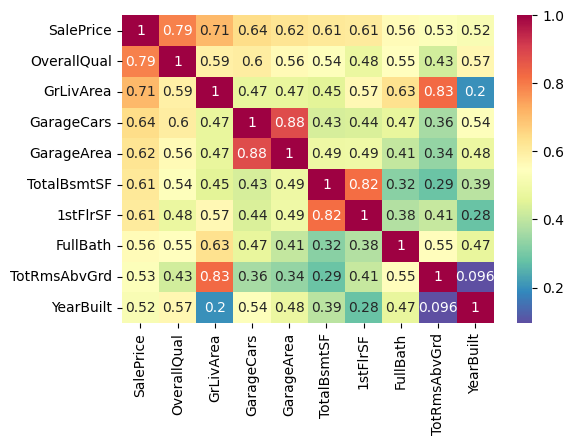

In [20]:
house_corr = housingdf.corr()
plt.figure(figsize=(6,4))
top_10_cols = house_corr.nlargest(10,'SalePrice')['SalePrice'].index

top_10_cm = np.corrcoef(housingdf[top_10_cols].values.T)
sns.heatmap(top_10_cm,cmap="Spectral_r",annot=True, yticklabels=top_10_cols.values, xticklabels=top_10_cols.values)

In [21]:
housingdf.drop(['PoolArea','MiscVal','3SsnPorch','BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageYrBlt','GarageCond','MasVnrArea'],axis=1,inplace = True)

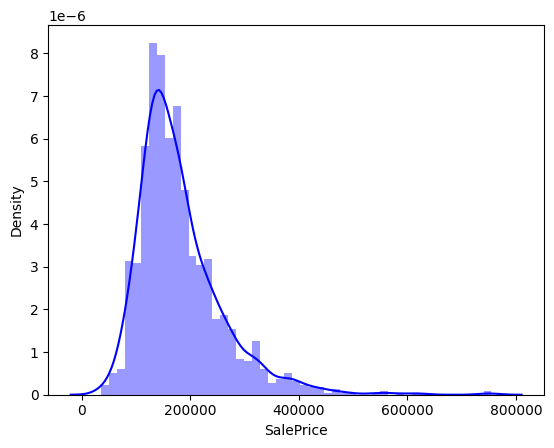

In [22]:
sns.distplot(housingdf['SalePrice'],color='b')
plt.show()

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

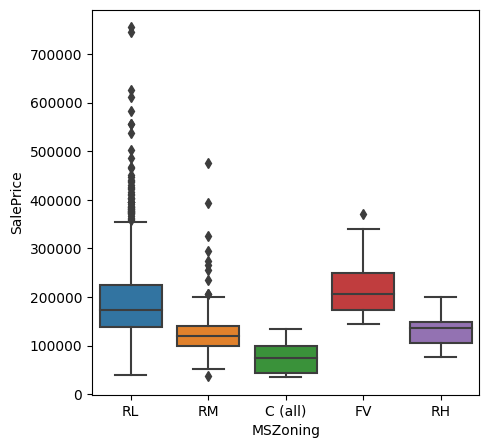

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(x="MSZoning",y="SalePrice",data=housingdf)

In [24]:
housingdf.shape

(1460, 67)

In [25]:
numeric_column = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = housingdf[numeric_column].quantile(0.05)
Q3 = housingdf[numeric_column].quantile(0.95)
IQR = Q3 - Q1

In [26]:
housingdf = housingdf[~((housingdf[numeric_column] < (Q1 - 1.5 * IQR)) |(housingdf[numeric_column] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
housingdf.shape

(1335, 67)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Gd'), Text(1, 0, 'TA'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

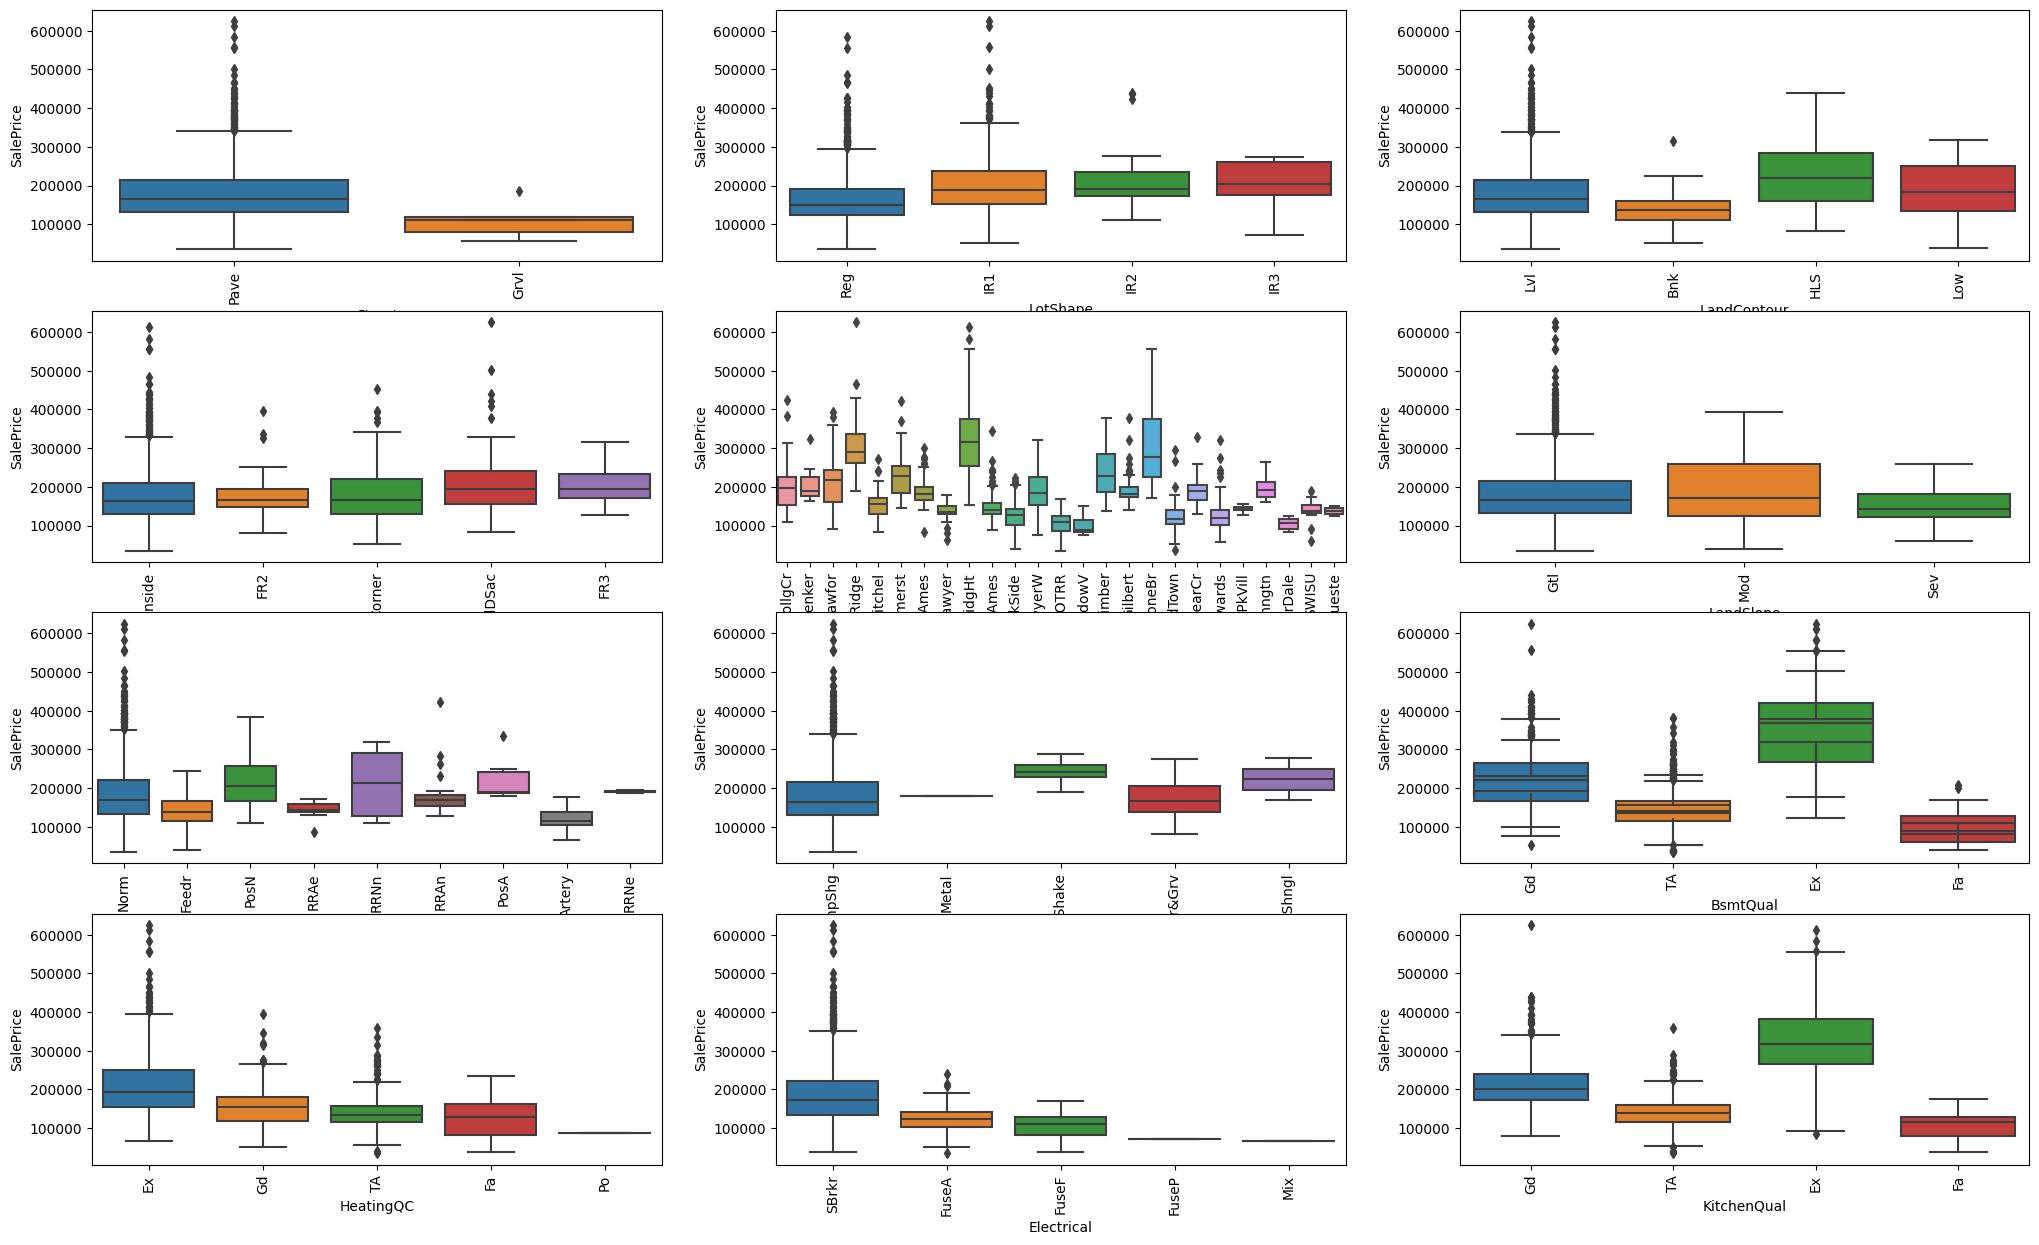

In [28]:
plt.figure(figsize=(25,15))
plt.subplot(4,3,1)
sns.boxplot(x="Street",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,2)
sns.boxplot(x="LotShape",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,3)
sns.boxplot(x="LandContour",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,4)
sns.boxplot(x="LotConfig",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,5)
sns.boxplot(x="Neighborhood",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,6)
sns.boxplot(x="LandSlope",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,7)
sns.boxplot(x="Condition1",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,8)
sns.boxplot(x="RoofMatl",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,9)
sns.boxplot(x="ExterQual",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,9)
sns.boxplot(x="BsmtQual",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,10)
sns.boxplot(x="HeatingQC",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,11)
sns.boxplot(x="Electrical",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,3,12)
sns.boxplot(x="KitchenQual",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'Sawyer'),
  Text(8, 0, 'NridgHt'),
  Text(9, 0, 'NAmes'),
  Text(10, 0, 'BrkSide'),
  Text(11, 0, 'SawyerW'),
  Text(12, 0, 'IDOTRR'),
  Text(13, 0, 'MeadowV'),
  Text(14, 0, 'Timber'),
  Text(15, 0, 'Gilbert'),
  Text(16, 0, 'StoneBr'),
  Text(17, 0, 'OldTown'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'Edwards'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

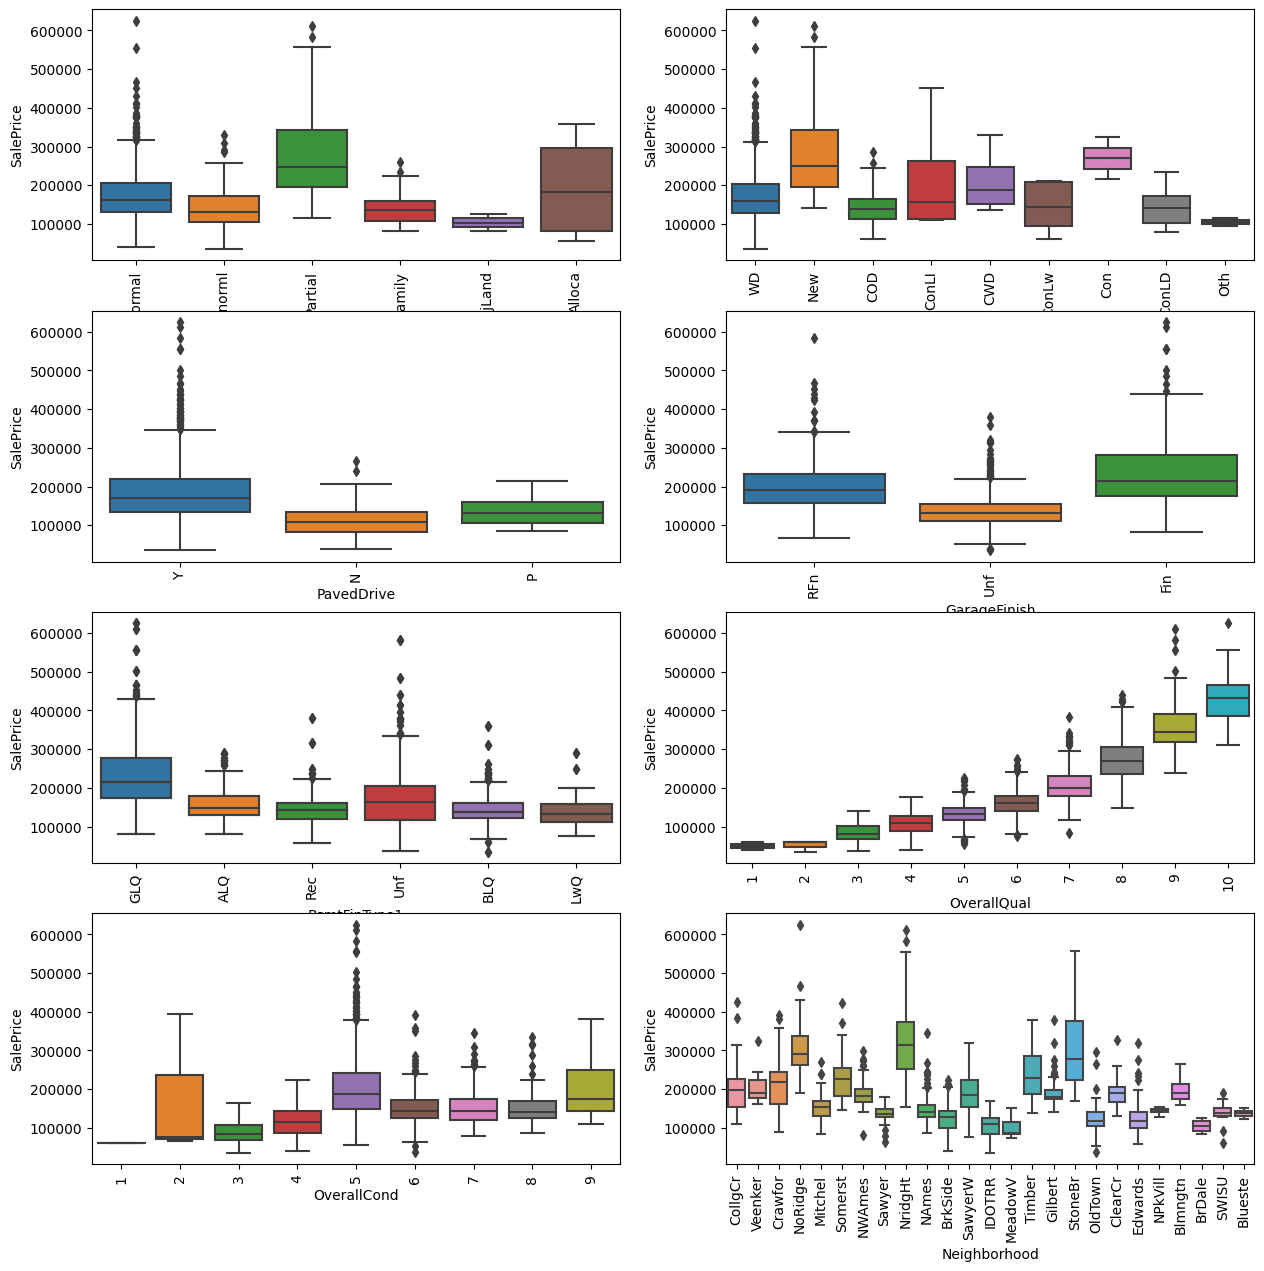

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(x="SaleCondition",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,2,2)
sns.boxplot(x="SaleType",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,2,3)
sns.boxplot(x="PavedDrive",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,2,4)
sns.boxplot(x="GarageFinish",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,2,5)
sns.boxplot(x="BsmtFinType1",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,2,5)
sns.boxplot(x="BsmtFinType1",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,2,6)
sns.boxplot(x="OverallQual",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,2,7)
sns.boxplot(x="OverallCond",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)
plt.subplot(4,2,8)
sns.boxplot(x="Neighborhood",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

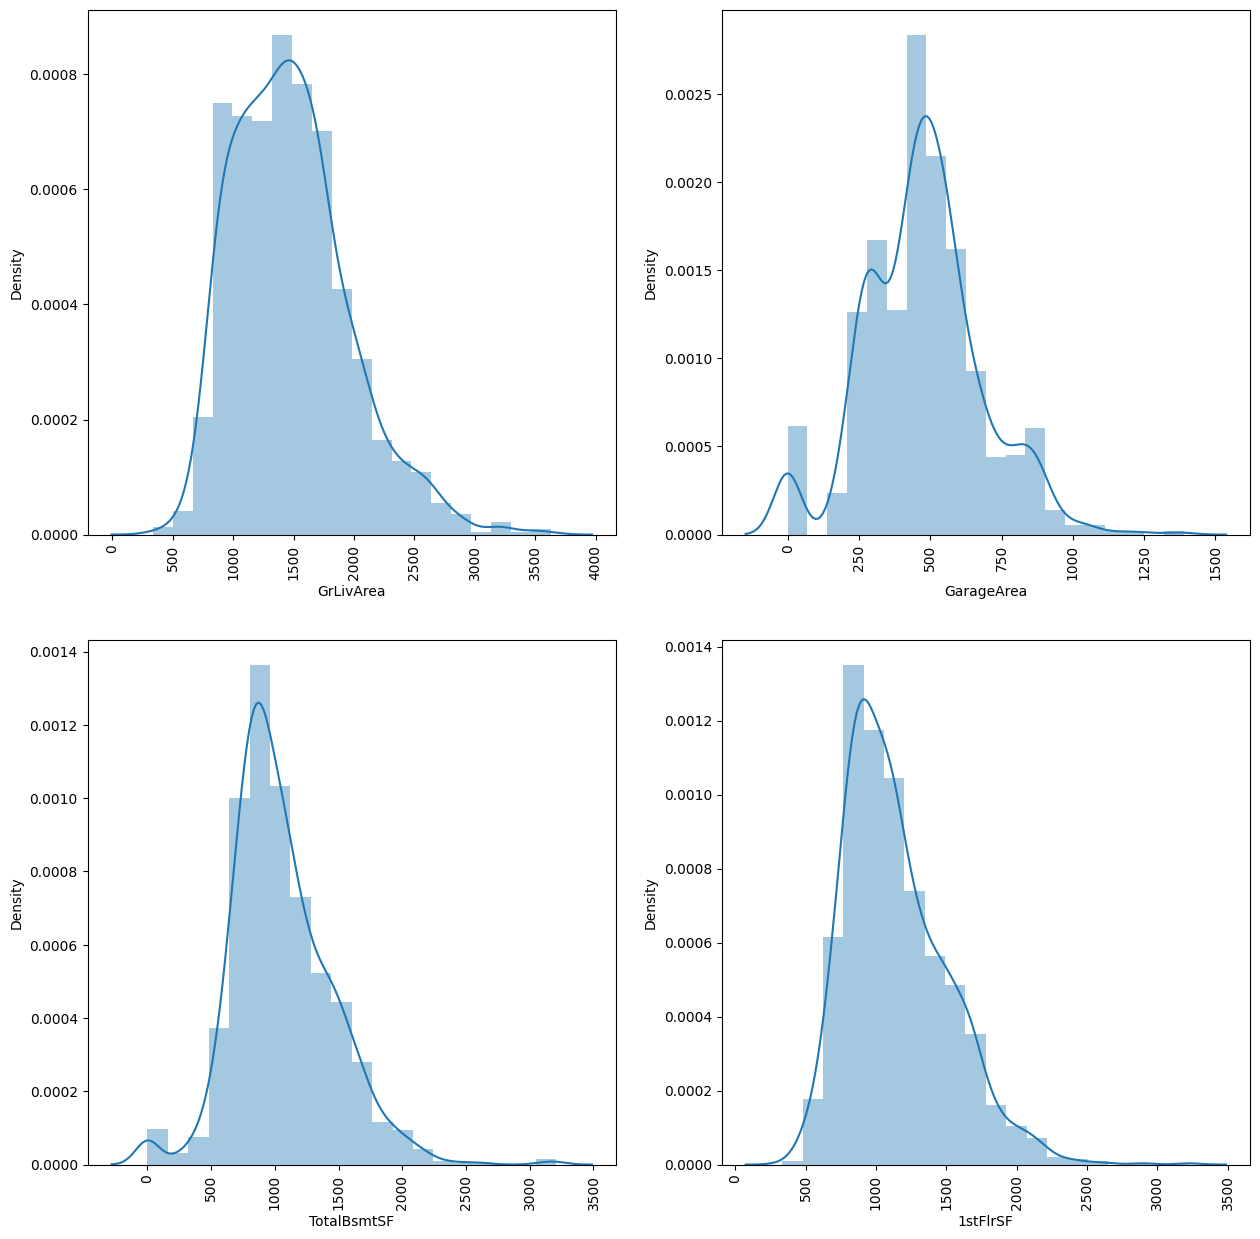

In [30]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(housingdf["GrLivArea"],bins=20)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.distplot(housingdf["GarageArea"],bins=20)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.distplot(housingdf["TotalBsmtSF"],bins=20)
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.distplot(housingdf["1stFlrSF"],bins=20)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106]),
 [Text(0, 0, '1875'),
  Text(1, 0, '1880'),
  Text(2, 0, '1882'),
  Text(3, 0, '1885'),
  Text(4, 0, '1890'),
  Text(5, 0, '1900'),
  Text(6, 0, '1904'),
  Text(7, 0, '1906'),
  Text(8, 0, '1908'),
  Text(9, 0, '1910'),
  Text(10, 0, '1911'),
  Text(11, 0, '1912'),
  Text(12, 0, '1913'),
  Text(13, 0, '1914'),
  Text(14, 0, '1915'),
  Text(15, 0, '1916'),
  Text(16, 0, '1917'),
  Text(17,

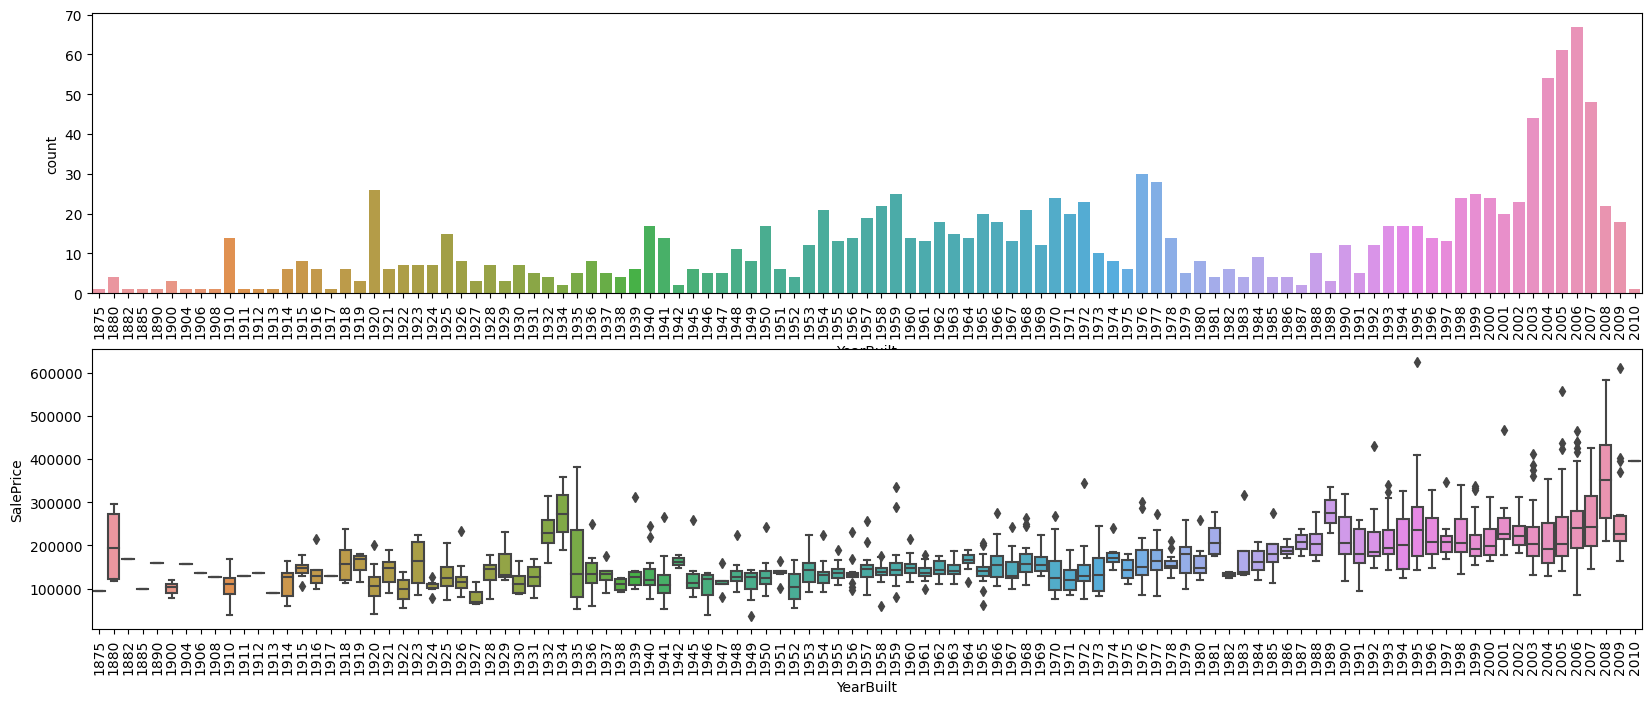

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
sns.countplot(housingdf["YearBuilt"])
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x="YearBuilt",y="SalePrice",data=housingdf)
plt.xticks(rotation=90)

In [32]:
housingdf['CentralAir'] = housingdf['CentralAir'].map({'Y': 1, 'N': 0})

In [33]:
housingdf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,...,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,731.465918,53.887640,69.573850,9728.501124,6.143071,5.590262,1973.208989,1985.715356,444.041199,39.316854,...,0.617228,1.779775,475.773783,94.641948,45.657678,21.273408,14.611985,6.301124,2007.817228,181577.729588
std,421.030242,40.113437,19.837669,4175.217296,1.357878,1.096838,29.265351,20.543037,425.639724,135.351259,...,0.628773,0.724002,207.007474,122.172012,60.669259,59.355252,52.961635,2.702787,1.326527,76193.682131
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,367.500000,20.000000,60.000000,7549.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,...,0.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131200.000000
50%,728.000000,50.000000,70.049958,9439.000000,6.000000,5.000000,1976.000000,1995.000000,399.000000,0.000000,...,1.000000,2.000000,478.000000,0.000000,27.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1099.500000,60.000000,79.000000,11476.500000,7.000000,6.000000,2002.000000,2004.000000,715.000000,0.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,182.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,2188.000000,972.000000,...,3.000000,4.000000,1390.000000,736.000000,364.000000,386.000000,396.000000,12.000000,2010.000000,625000.000000


In [34]:
y = housingdf['SalePrice']
housingdf_model = housingdf
housingdf_model.drop(['Id','SalePrice'],axis=1,inplace=True)

In [35]:
housingdf_model.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,548,Y,0,61,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,460,Y,298,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,608,Y,0,42,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,642,Y,0,35,272,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,836,Y,192,84,0,0,12,2008,WD,Normal


In [36]:
housingdf_model.shape

(1335, 65)

In [37]:
housingdf_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1335 non-null   int64  
 1   MSZoning       1335 non-null   object 
 2   LotFrontage    1335 non-null   float64
 3   LotArea        1335 non-null   int64  
 4   Street         1335 non-null   object 
 5   LotShape       1335 non-null   object 
 6   LandContour    1335 non-null   object 
 7   Utilities      1335 non-null   object 
 8   LotConfig      1335 non-null   object 
 9   LandSlope      1335 non-null   object 
 10  Neighborhood   1335 non-null   object 
 11  Condition1     1335 non-null   object 
 12  Condition2     1335 non-null   object 
 13  BldgType       1335 non-null   object 
 14  HouseStyle     1335 non-null   object 
 15  OverallQual    1335 non-null   int64  
 16  OverallCond    1335 non-null   int64  
 17  YearBuilt      1335 non-null   int64  
 18  YearRemo

<AxesSubplot:xlabel='FullBath', ylabel='count'>

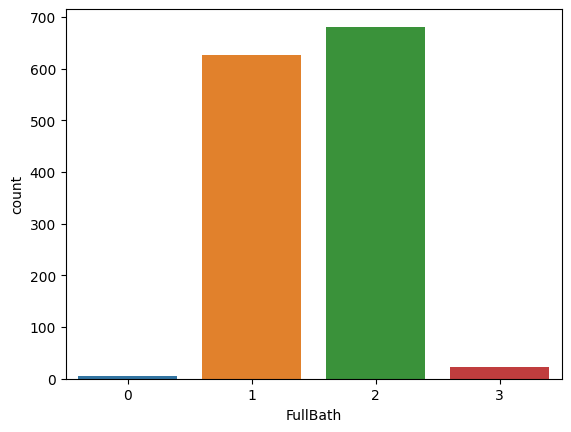

In [38]:
sns.countplot(housingdf_model["FullBath"])

In [39]:
house_categorical_vars_to_dummy = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'Heating', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition','OverallQual','OverallCond']

In [40]:
#house_categorical_vars_to_dummy=housingdf_model.select_dtypes(include='object').columns
#house_categorical_vars_to_dummy

In [41]:
for column in house_categorical_vars_to_dummy:
    dummy_df = pd.get_dummies(housingdf_model[column], prefix = column, drop_first=True)
    housingdf_model = pd.concat([housingdf_model,dummy_df],axis = 1)

In [42]:
for column in house_categorical_vars_to_dummy:
    housingdf_model = housingdf_model.drop(column,1)

In [43]:
housingdf_model.shape

(1335, 220)

In [44]:
housingdf_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1459
Columns: 220 entries, MSSubClass to OverallCond_9
dtypes: float64(1), int64(29), uint8(190)
memory usage: 603.0 KB


In [45]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
standard_scaler = StandardScaler()

In [46]:
housingdf_model[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]] = standard_scaler.fit_transform(housingdf_model[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]])
housingdf_model[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea"]] = standard_scaler.fit_transform(housingdf_model[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea"]])
housingdf_model[["WoodDeckSF","OpenPorchSF","EnclosedPorch","ScreenPorch","MoSold","YrSold"]] = standard_scaler.fit_transform(housingdf_model[["WoodDeckSF","OpenPorchSF","EnclosedPorch","ScreenPorch","MoSold","YrSold"]])

In [47]:
housingdf_model.shape

(1335, 220)

In [48]:
from sklearn.preprocessing import scale
columns = housingdf_model.columns
housingdf_model = pd.DataFrame(scale(housingdf_model))
housingdf_model.columns = columns
housingdf_model.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       ...
       'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9'],
      dtype='object', length=220)

In [49]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(housingdf_model, y, train_size=0.7,test_size = 0.3, random_state=100)

In [50]:
print(X_train.shape)
print(X_test.shape)

(934, 220)
(401, 220)


In [51]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',
                        n_jobs = 60,
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
print(model_cv.best_params_)

{'alpha': 10.0}


In [53]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge_model = ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.16760559e+03  7.60368251e+02  5.21986075e+03  8.22498099e+03
  1.32566524e+03  6.60935877e+03  8.72536358e+02  1.72968569e+02
  7.58893743e+03  7.86562033e+01  6.81507860e+03  9.80643864e+03
  0.00000000e+00  1.38384608e+04  1.54248332e+03 -5.92612243e+01
  3.38177008e+03  1.81270740e+03 -2.39572150e+03  0.00000000e+00
  2.41372616e+03  7.07759862e+02  1.30270866e+03  4.34248268e+03
  1.81476924e+03  2.27393343e+03  1.66515146e+03  2.35627134e+03
 -6.49956460e+02 -5.76452187e+02  5.53690146e+03  1.97805479e+03
  8.09876290e+03  7.38272882e+03 -1.43573378e+02  6.76833430e+02
 -1.77459736e+02  5.01197694e+02  1.61083395e+03 -4.38573550e+02
  4.66234310e+01 -1.15180239e+03  1.92158015e+03 -1.10399564e+03
 -9.37355965e+02 -1.53824255e+01  1.21062782e+03 -4.11903057e+03
  2.80762620e+02  1.06129286e+03  2.08158918e+03 -6.21162266e+02
 -6.33152914e+02  3.84150465e+03 -2.43630330e+03 -6.68625560e+02
 -8.98790041e+02 -1.15549008e+03 -2.04081003e+03 -1.25509117e+03
  7.13165159e+02 -2.17493

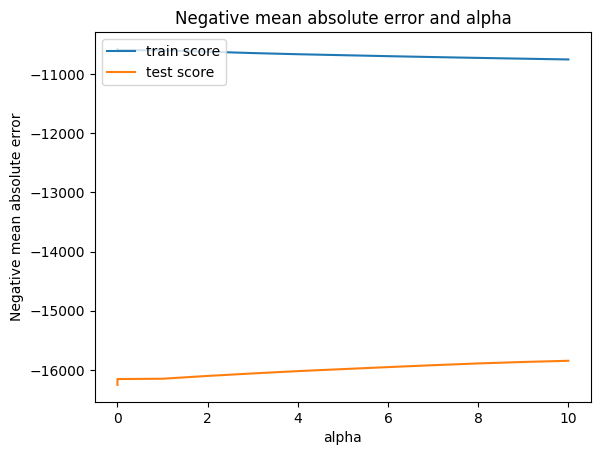

In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results.head()
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title("Negative mean absolute error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print("Train r2 = "+str(r2_score(y_train,y_train_pred)))
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)
print("Test r2 = "+str(r2_score(y_test,y_test_pred)))
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))
train_rmse_ridge = train_mse_ridge ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
test_rmse_ridge = train_mse_ridge ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))

Train r2 = 0.9479530877940096
Test r2 = 0.959113241557901
Train RSS = 256587751154.03436
Test RSS = 114313201644.78853
Train MSE = 274719219.6510004
Test MSE = 285070328.2912432
Train RMSE = 16574.65594366895
Test RMSE = 16574.65594366895


In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
alpha = 8
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print("Train r2 = "+str(r2_score(y_train,y_train_pred)))
alpha = 8
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)
print("Test r2 = "+str(r2_score(y_test,y_test_pred)))
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))
train_rmse_ridge = train_mse_ridge ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
test_rmse_ridge = train_mse_ridge ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))

Train r2 = 0.9487926838925942
Test r2 = 0.9626667950703506
Train RSS = 252448599268.11813
Test RSS = 104378002702.58209
Train MSE = 270287579.5161864
Test MSE = 260294271.07875833
Train RMSE = 16440.42516226957
Test RMSE = 16440.42516226957


In [57]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print("Train r2 = "+str(r2_score(y_train,y_train_pred)))
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)
print("Test r2 = "+str(r2_score(y_test,y_test_pred)))
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))
train_rmse_ridge = train_mse_ridge ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
test_rmse_ridge = train_mse_ridge ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))

Train r2 = 0.9486364546896796
Test r2 = 0.9619237806507741
Train RSS = 253218798654.42917
Test RSS = 106455358805.2998
Train MSE = 271112204.12679785
Test MSE = 265474710.23765537
Train RMSE = 16465.485238121524
Test RMSE = 16465.485238121524


In [58]:
metric_ridge=[]
metric_ridge.append(r2_score(y_train,y_train_pred))
metric_ridge.append(r2_score(y_test,y_test_pred))
metric_ridge.append(train_rss_ridge)
metric_ridge.append(test_rss_ridge)
metric_ridge.append(train_rmse_ridge)
metric_ridge.append(test_rmse_ridge)

In [59]:
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print("Train r2 = "+str(r2_score(y_train,y_train_pred)))
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)
print("Test r2 = "+str(r2_score(y_test,y_test_pred)))
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))
train_rmse_ridge = train_mse_ridge ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
test_rmse_ridge = train_mse_ridge ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))

Train r2 = 0.9490464180151787
Test r2 = 0.9639760524204773
Train RSS = 251197707233.49908
Test RSS = 100717516883.39182
Train MSE = 268948294.6825472
Test MSE = 251165877.5146928
Train RMSE = 16399.643126682582
Test RMSE = 16399.643126682582


In [60]:
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print("Train r2 = "+str(r2_score(y_train,y_train_pred)))
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)
print("Test r2 = "+str(r2_score(y_test,y_test_pred)))
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))
train_rmse_ridge = train_mse_ridge ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
test_rmse_ridge = train_mse_ridge ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))

Train r2 = 0.9438655951712346
Test r2 = 0.9472447612094929
Train RSS = 276738812869.0043
Test RSS = 147495680251.0614
Train MSE = 296294232.1937947
Test MSE = 367819651.49890625
Train RMSE = 17213.199359613387
Test RMSE = 17213.199359613387


In [61]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print("Train r2 = "+str(r2_score(y_train,y_train_pred)))
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)
print("Test r2 = "+str(r2_score(y_test,y_test_pred)))
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))
train_rmse_ridge = train_mse_ridge ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
test_rmse_ridge = train_mse_ridge ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))

Train r2 = 0.9494008567089276
Test r2 = 0.9660239936210409
Train RSS = 249450348485.47073
Test RSS = 94991782578.77081
Train MSE = 267077460.9052149
Test MSE = 236887238.35104942
Train RMSE = 16342.50473168709
Test RMSE = 16342.50473168709


In [62]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print("Train r2 = "+str(r2_score(y_train,y_train_pred)))
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)
print("Test r2 = "+str(r2_score(y_test,y_test_pred)))
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))
train_rmse_ridge = train_mse_ridge ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
test_rmse_ridge = train_mse_ridge ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))

Train r2 = 0.9486364546896796
Test r2 = 0.9619237806507741
Train RSS = 253218798654.42917
Test RSS = 106455358805.2998
Train MSE = 271112204.12679785
Test MSE = 265474710.23765537
Train RMSE = 16465.485238121524
Test RMSE = 16465.485238121524


In [63]:
lasso = Lasso()
model_lasso__cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',
                        n_jobs=60,
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_lasso__cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
print(model_lasso__cv.best_params_)

{'alpha': 10.0}


In [65]:
alpha =10
lasso = Lasso(alpha=alpha)       
lasso_model = lasso.fit(X_train, y_train)
lasso.coef_

array([-4.30387659e+03,  6.08259722e+02,  5.42702294e+03,  9.64753822e+03,
        9.71666691e+02,  6.63435011e+03,  8.78039694e+02, -0.00000000e+00,
        8.12974712e+03, -1.70604151e+02,  1.00800652e+04,  1.53646296e+04,
        0.00000000e+00,  9.70827295e+03,  1.51334078e+03, -3.64079760e+01,
        3.02241344e+03,  1.29148512e+03, -2.74120852e+03,  0.00000000e+00,
        2.21660824e+03,  5.30293847e+02,  1.57874293e+03,  4.09379736e+03,
        1.88430558e+03,  2.12862321e+03,  1.75829269e+03,  2.36598005e+03,
       -7.03180254e+02, -5.22663867e+02,  1.23454733e+04,  4.76938744e+03,
        2.07279161e+04,  1.74914721e+04, -6.93835024e+02,  5.55209529e+02,
       -1.93367767e+02,  6.76834699e+02,  1.75454714e+03, -3.11241412e+02,
        1.49281519e+02, -1.20105471e+03,  1.95294142e+03, -1.10146489e+03,
       -8.35517801e+02,  9.91581639e+00,  1.24223696e+03, -4.25743963e+03,
        3.79207533e+02,  1.52019324e+03,  2.83124520e+03, -4.01502519e+02,
       -6.98711335e+01,  

In [66]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [67]:
cv_result = pd.DataFrame(model_cv.cv_results_)

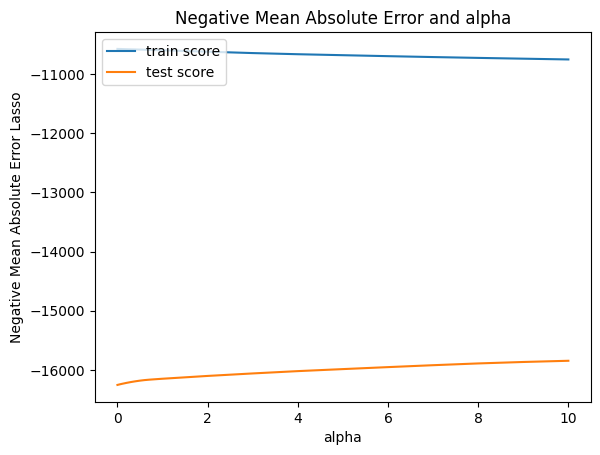

In [68]:
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error Lasso')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
alpha =10
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
print("Train R2 = " + str((r2_score(y_train,y_train_pred))))
#alpha =10
lasso = Lasso(alpha=alpha)
lasso.fit(X_test, y_test)
y_test_pred=lasso.predict(X_test)
print("Test r2 = "+ str(r2_score(y_test,y_test_pred)))
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))
train_rmse_lasso = train_mse_lasso ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
test_rmse_lasso = test_mse_lasso ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))

Train R2 = 0.9493519585924867
Test r2 = 0.9662100770842414
Train RSS = 249691412886.82465
Test RSS = 94471521319.08337
Train MSE = 267335559.83600068
Test MSE = 235589828.7258937
Train RMSE = 16350.399378486161
Test RMSE = 15348.935752223791


In [71]:
metric_lasso = []
metric_lasso.append(r2_score(y_train,y_train_pred))
metric_lasso.append(r2_score(y_test,y_test_pred))
metric_lasso.append(train_rss_lasso)
metric_lasso.append(test_rss_lasso)
metric_lasso.append(train_rmse_lasso)
metric_lasso.append(test_rmse_lasso)

In [72]:
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
print("Train R2 = " + str((r2_score(y_train,y_train_pred))))
#alpha =10
lasso = Lasso(alpha=alpha)
lasso.fit(X_test, y_test)
y_test_pred=lasso.predict(X_test)
print("Test r2 = "+ str(r2_score(y_test,y_test_pred)))
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))
train_rmse_lasso = train_mse_lasso ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
test_rmse_lasso = test_mse_lasso ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))

Train R2 = 0.9494484175092001
Test r2 = 0.9663104000833999
Train RSS = 249215876962.22833
Test RSS = 94191033364.80733
Train MSE = 266826420.7304372
Test MSE = 234890357.51822275
Train RMSE = 16334.82233544146
Test RMSE = 15326.133156090702


In [73]:
alpha =1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
print("Train R2 = " + str((r2_score(y_train,y_train_pred))))
#alpha =10
lasso = Lasso(alpha=alpha)
lasso.fit(X_test, y_test)
y_test_pred=lasso.predict(X_test)
print("Test r2 = "+ str(r2_score(y_test,y_test_pred)))
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))
train_rmse_lasso = train_mse_lasso ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
test_rmse_lasso = test_mse_lasso ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))

Train R2 = 0.9494458970745381
Test r2 = 0.9663084260937526
Train RSS = 249228302534.36023
Test RSS = 94196552341.7377
Train MSE = 266839724.3408568
Test MSE = 234904120.55296186
Train RMSE = 16335.229546622746
Test RMSE = 15326.582154967293


In [74]:
alpha =10
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
print("Train R2 = " + str((r2_score(y_train,y_train_pred))))
#alpha =10
lasso = Lasso(alpha=alpha)
lasso.fit(X_test, y_test)
y_test_pred=lasso.predict(X_test)
print("Test r2 = "+ str(r2_score(y_test,y_test_pred)))
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))
train_rmse_lasso = train_mse_lasso ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
test_rmse_lasso = test_mse_lasso ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))

Train R2 = 0.9493519585924867
Test r2 = 0.9662100770842414
Train RSS = 249691412886.82465
Test RSS = 94471521319.08337
Train MSE = 267335559.83600068
Test MSE = 235589828.7258937
Train RMSE = 16350.399378486161
Test RMSE = 15348.935752223791


In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 51),
 ('LotFrontage', False, 168),
 ('LotArea', False, 27),
 ('YearBuilt', False, 18),
 ('YearRemodAdd', False, 151),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 182),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 8),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 57),
 ('BsmtHalfBath', False, 197),
 ('FullBath', False, 56),
 ('HalfBath', False, 59),
 ('BedroomAbvGr', False, 52),
 ('KitchenAbvGr', False, 6),
 ('TotRmsAbvGrd', False, 45),
 ('Fireplaces', False, 125),
 ('GarageCars', False, 106),
 ('GarageArea', False, 21),
 ('WoodDeckSF', False, 69),
 ('OpenPorchSF', False, 76),
 ('EnclosedPorch', False, 85),
 ('ScreenPorch', False, 58),
 ('MoSold', False, 135),
 ('YrSold', False, 155),
 ('MSZoning_FV', False, 41),
 ('MSZoning_RH', False, 44),
 ('MSZoning_RL', False, 42),
 ('MSZoning_RM', False, 43),
 ('Street_Pave', False, 130),
 ('LotShape_IR2', False

In [76]:
y_pred = lasso.predict(X_test)
residual = y_test - y_pred

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

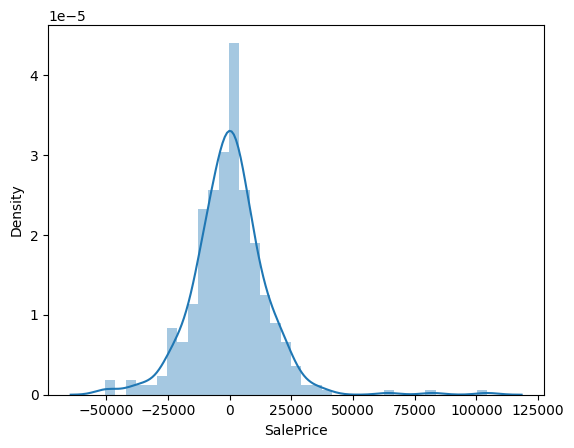

In [77]:
sns.distplot(residual)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1500x1500 with 0 Axes>

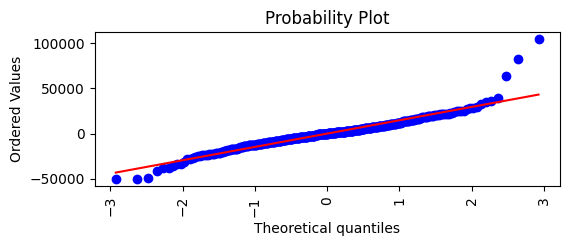

In [78]:
import scipy as sp
import statsmodels.tsa.api as smt
plt.figure(figsize=(15,15))
fig, ax = plt.subplots(figsize=(6,2))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
plt.xticks(rotation=90)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

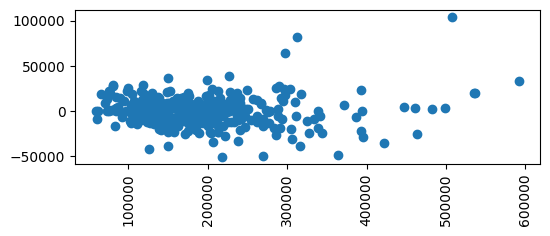

In [79]:
fig, ax = plt.subplots(figsize=(6,2))
_ = ax.scatter(y_pred, residual)
plt.xticks(rotation=90)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

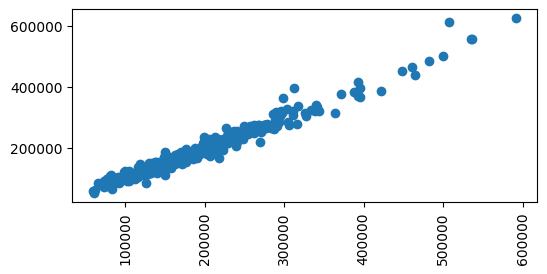

In [80]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, y_test)
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

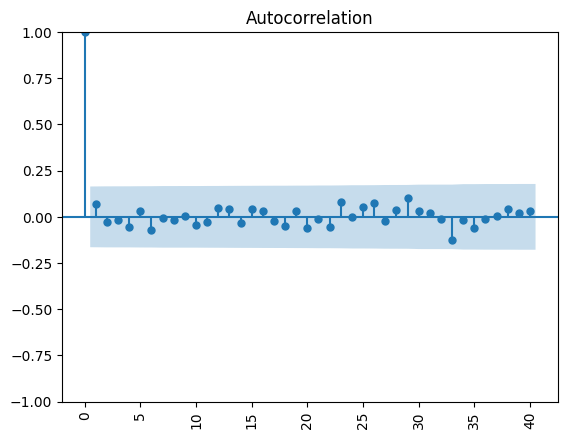

In [81]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.001)
acf.show()
plt.xticks(rotation=90)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

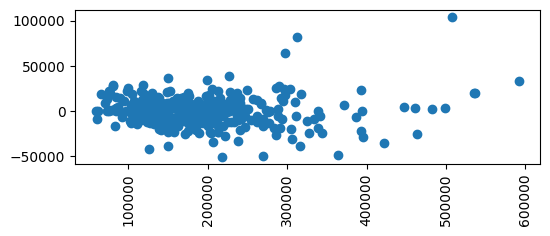

In [82]:
fig, ax = plt.subplots(figsize=(6,2))
_ = ax.scatter(y_pred, residual)
plt.xticks(rotation=90)

In [83]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 10
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    y_pred_train = lasso.predict(X_train)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

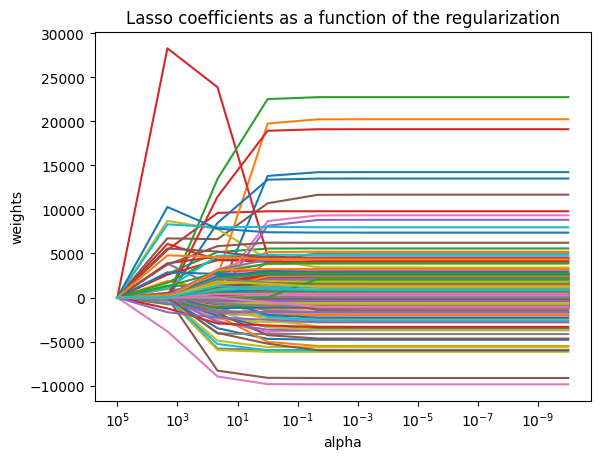

In [84]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [85]:
MSE_train_Ridge=[]
MSE_test_Ridge=[]
MSE_train_Lasso=[]
MSE_test_Lasso=[]

n_alphas = 10
alphas = np.logspace(-1, 2, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    y_pred_train = ridge.predict(X_train)
    MSE_train_Ridge.append(r2_score(y_train,y_pred_train))
    y_pred_test = ridge.predict(X_test)
    MSE_test_Ridge.append(r2_score(y_test,y_pred_test))

<AxesSubplot:>

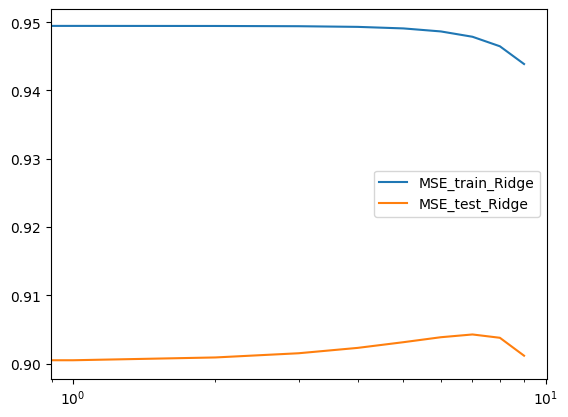

In [86]:
Results = pd.DataFrame({'MSE_train_Ridge':MSE_train_Ridge,"MSE_test_Ridge":MSE_test_Ridge})
Results.plot(legend=True,logx=True)

In [87]:
n_alphas = 10
alphas = np.logspace(-1, 2, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred_train = lasso.predict(X_train)
    MSE_train_Lasso.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test)
    MSE_test_Lasso.append(mean_squared_error(y_test,y_pred_test))

<AxesSubplot:>

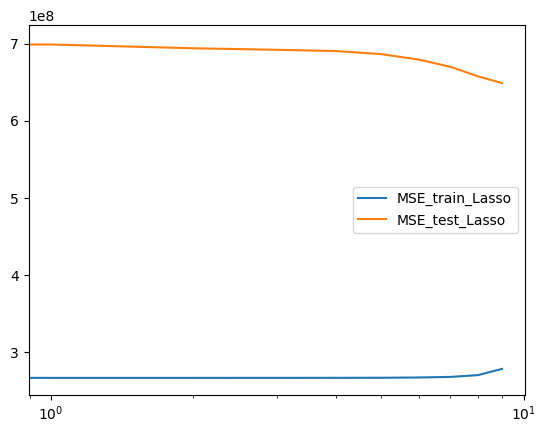

In [88]:
Results = pd.DataFrame({'MSE_train_Lasso':MSE_train_Lasso,"MSE_test_Lasso":MSE_test_Lasso})
Results.plot(legend=True,logx=True)

In [89]:
ridge_max_col = ""
ridge_max_coef = 0
ridge_double_max_col = ""
ridge_double_max_coef = 0

lasso_max_col = ""
lasso_max_coef = 0
lasso_double_max_col = ""
lasso_double_max_coef = 0
ridge_model = ridge.fit(X_train, y_train)
lasso_model = lasso.fit(X_train, y_train) 
for (coef,column) in zip(ridge_model.coef_, X_train.columns):
    if coef > ridge_max_coef:
        ridge_max_coef = coef
        ridge_max_col = column

for (coef,column) in zip(lasso_model.coef_, X_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column

        
print("Ridge max col = ",ridge_max_col)
print("Ridge max coef = ",ridge_max_coef)
print("Lasso max col = ",lasso_max_col)
print("Lasso max coef = ",lasso_max_coef)

Ridge max col =  GrLivArea
Ridge max coef =  10515.084934735196
Lasso max col =  GrLivArea
Lasso max coef =  25205.57852199168


In [90]:
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9'],
      dtype='object')

In [91]:
for (coef,column) in zip(lasso_model.coef_, X_train.columns):
    print("{} {}".format(column,coef))

MSSubClass -2677.9539400113267
LotFrontage 704.5802086922247
LotArea 4817.778281572176
YearBuilt 9769.289165598047
YearRemodAdd 1362.468355058788
BsmtFinSF1 6564.843121634579
BsmtFinSF2 683.5130200536279
BsmtUnfSF -0.0
TotalBsmtSF 7245.852044561986
CentralAir 0.0
1stFlrSF 0.0
2ndFlrSF 616.6708326684171
LowQualFinSF 0.0
GrLivArea 25205.57852199168
BsmtFullBath 1490.3984180570149
BsmtHalfBath -0.0
FullBath 2450.2229227744783
HalfBath 1061.7008015451322
BedroomAbvGr -1970.1215986218806
KitchenAbvGr 0.0
TotRmsAbvGrd 1841.0137778329847
Fireplaces 815.3801610485924
GarageCars 1031.8602280488192
GarageArea 4478.203911045182
WoodDeckSF 1535.7929788442555
OpenPorchSF 2159.876900461262
EnclosedPorch 1394.2595875437635
ScreenPorch 2299.352661836045
MoSold -529.8414493771327
YrSold -245.38906742948933
MSZoning_FV 3575.051432205015
MSZoning_RH 1070.9060086606764
MSZoning_RL 4640.138061529551
MSZoning_RM 3687.3958076705003
Street_Pave 157.6298877714773
LotShape_IR2 608.4521071955462
LotShape_IR3 -41

In [92]:
for (coef,column) in zip(ridge_model.coef_, X_train.columns):
    print("{} {}".format(column,coef))

MSSubClass -1440.2150900963077
LotFrontage 1388.961763792138
LotArea 4237.009360767688
YearBuilt 4649.44722827925
YearRemodAdd 2132.7342794662745
BsmtFinSF1 5943.468664909545
BsmtFinSF2 552.7229979561328
BsmtUnfSF 435.1743313966414
TotalBsmtSF 7052.447655885617
CentralAir 597.6173577773393
1stFlrSF 7049.4756894234
2ndFlrSF 5841.000046961497
LowQualFinSF 0.0
GrLivArea 10515.084934735196
BsmtFullBath 1880.2349991013539
BsmtHalfBath -64.80293717237566
FullBath 3565.5072848163077
HalfBath 2426.606670658144
BedroomAbvGr -1291.7753659497482
KitchenAbvGr 0.0
TotRmsAbvGrd 3703.0667008844816
Fireplaces 1587.1342942917208
GarageCars 2014.609531269375
GarageArea 4527.492315352061
WoodDeckSF 1699.5856679481878
OpenPorchSF 2689.541570417705
EnclosedPorch 1199.2328388955536
ScreenPorch 2134.685687957011
MoSold -257.9707744030211
YrSold -422.2963940042009
MSZoning_FV 1447.3251793148097
MSZoning_RH 326.252838647927
MSZoning_RL 1274.6631378718896
MSZoning_RM 1160.295294112419
Street_Pave 528.4789758388

In [93]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso'],ascending=False)

,Lasso
GrLivArea,25205.578522
YearBuilt,9769.289166
OverallQual_9,8324.307863
OverallQual_8,8032.946422
TotalBsmtSF,7245.852045
BsmtFinSF1,6564.843122
SaleType_New,5672.922192
Functional_Typ,5048.126792
OverallQual_10,4841.542091
LotArea,4817.778282


In [94]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge'],ascending=False)

,Ridge
GrLivArea,1.051508e+04
OverallQual_9,7.244276e+03
TotalBsmtSF,7.052448e+03
1stFlrSF,7.049476e+03
BsmtFinSF1,5.943469e+03
2ndFlrSF,5.841000e+03
OverallQual_8,5.777841e+03
Neighborhood_NridgHt,4.869963e+03
YearBuilt,4.649447e+03
Neighborhood_NoRidge,4.544635e+03


In [95]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )


In [96]:
rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

In [97]:
final_metric


,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.486365e-01,9.493520e-01
1,R2 Score (Test),9.619238e-01,9.662101e-01
2,RSS (Train),2.532188e+11,2.496914e+11
3,RSS (Test),1.064554e+11,9.447152e+10
4,MSE (Train),1.646549e+04,1.635040e+04
5,MSE (Test),1.646549e+04,1.534894e+04


In [ ]:
#How well those variables describe the price of a house
##  FINAL Meric is displaying the r2

In [98]:
#lasso regression we are getting a good score

In [99]:
print(max(ridge_model.coef_))
print(max(lasso_model.coef_))

10515.084934735196
25205.57852199168


In [100]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso'],ascending=False)
betas.head(70)

,Ridge,Lasso
MSSubClass,-1440.215090,-2677.953940
LotFrontage,1388.961764,704.580209
LotArea,4237.009361,4817.778282
YearBuilt,4649.447228,9769.289166
YearRemodAdd,2132.734279,1362.468355
BsmtFinSF1,5943.468665,6564.843122
BsmtFinSF2,552.722998,683.513020
BsmtUnfSF,435.174331,-0.000000
TotalBsmtSF,7052.447656,7245.852045
CentralAir,597.617358,0.000000


Which variables are significant in predicting the price of a house
significant Variable Lasso
GrLivArea
YearBuilt
OverallQual_9
OverallQual_8
TotalBsmtSF
BsmtFinSF1
SaleType_New
Functional_Typ
OverallQual_10
LotArea

In [105]:
## Removing top 5 predictor variables
X_train2 = X_train.drop(['GrLivArea','YearBuilt','OverallQual_9','OverallQual_8','TotalBsmtSF'],axis=1)
X_test2 = X_test.drop(['GrLivArea','YearBuilt','OverallQual_9','OverallQual_8','TotalBsmtSF'],axis=1)


In [118]:
lasso_excluding_5 = Lasso(alpha=10)
lasso_excluding_5_model = lasso_excluding_5.fit(X_train2, y_train)
lasso_excluding_5_model.coef_

array([-5.81999573e+03,  7.01346188e+02,  5.52361033e+03,  1.77094401e+03,
        1.58054666e+04,  3.74345816e+03,  9.63393050e+03,  1.82310369e+02,
        1.64190899e+04,  2.29392288e+04,  0.00000000e+00,  1.49867209e+03,
        0.00000000e+00,  3.98641501e+03,  2.00574029e+03, -2.48142514e+03,
        0.00000000e+00,  2.09549866e+03,  7.38869469e+02,  2.41061941e+03,
        4.10005335e+03,  2.21443664e+03,  2.15860651e+03,  1.25425950e+03,
        2.10489910e+03, -6.54819802e+02, -6.86284870e+02,  1.22253560e+04,
        4.64003334e+03,  1.94454985e+04,  1.72944041e+04, -1.40200231e+03,
        3.97267949e+02, -2.64675362e+02,  2.72329077e+02,  2.05198631e+03,
       -4.50648593e+02,  3.96037594e+01, -1.27187239e+03,  1.88562681e+03,
       -1.39744070e+03, -7.77671627e+02, -1.52942135e+02,  9.38494534e+02,
       -4.46601095e+03,  2.29449867e+02,  1.19762741e+03,  1.31316072e+03,
       -8.81988716e+02, -2.20210261e+02,  3.04441930e+03, -3.27397145e+03,
       -4.08439775e+02, -

In [107]:
y_train_pred = lasso_excluding_5.predict(X_train2)
y_test_pred = lasso_excluding_5.predict(X_test2)

In [120]:
cv_result = pd.DataFrame(model_cv.cv_results_)

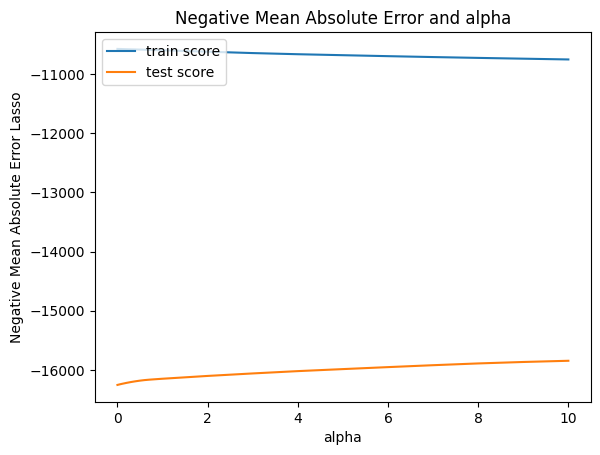

In [109]:
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error Lasso')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [110]:
alpha =10
lasso = Lasso(alpha=alpha)
lasso.fit(X_train2, y_train)
y_train_pred=lasso.predict(X_train2)
print("Train R2 = " + str((r2_score(y_train,y_train_pred))))
alpha =10
lasso = Lasso(alpha=alpha)
lasso.fit(X_test2, y_test)
y_test_pred=lasso.predict(X_test2)
print("Test r2 = "+ str(r2_score(y_test,y_test_pred)))
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))
train_rmse_lasso = train_mse_lasso ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
test_rmse_lasso = test_mse_lasso ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))

Train R2 = 0.9475108386934367
Test r2 = 0.9525943212768013
Train RSS = 258768009258.81454
Test RSS = 132539118224.96823
Train MSE = 277053543.1036558
Test MSE = 330521491.8328385
Train RMSE = 16644.925446022757
Test RMSE = 18180.250048688507


In [111]:
lasso_max_col = ""
lasso_max_coef = 0
lasso_double_max_col = ""
lasso_double_max_coef = 0
lasso_model = lasso.fit(X_train2, y_train) 

for (coef,column) in zip(lasso_model.coef_, X_train2.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column

print("Lasso max col = ",lasso_max_col)
print("Lasso max coef = ",lasso_max_coef)

Lasso max col =  2ndFlrSF
Lasso max coef =  22939.22875053499


In [112]:
for (coef,column) in zip(lasso_model.coef_, X_train2.columns):
    print("{} {}".format(column,coef))

MSSubClass -5819.995728646307
LotFrontage 701.3461880369767
LotArea 5523.610333145628
YearRemodAdd 1770.9440124314633
BsmtFinSF1 15805.46663520975
BsmtFinSF2 3743.4581572242664
BsmtUnfSF 9633.930497193234
CentralAir 182.31036890190586
1stFlrSF 16419.089881639124
2ndFlrSF 22939.22875053499
LowQualFinSF 0.0
BsmtFullBath 1498.6720890971073
BsmtHalfBath 0.0
FullBath 3986.4150137335687
HalfBath 2005.7402868710305
BedroomAbvGr -2481.425140937857
KitchenAbvGr 0.0
TotRmsAbvGrd 2095.4986619672272
Fireplaces 738.8694692046946
GarageCars 2410.6194115346725
GarageArea 4100.053348035172
WoodDeckSF 2214.4366394082963
OpenPorchSF 2158.60650513811
EnclosedPorch 1254.2595038949396
ScreenPorch 2104.8991040970636
MoSold -654.8198021807617
YrSold -686.2848701007881
MSZoning_FV 12225.355965718853
MSZoning_RH 4640.033335895914
MSZoning_RL 19445.49852548423
MSZoning_RM 17294.404125003937
Street_Pave -1402.0023120875892
LotShape_IR2 397.2679493935541
LotShape_IR3 -264.6753620219518
LotShape_Reg 272.3290766869

In [ ]:
## Predictor value after removing the top5
#2ndFlrSF
#MSZoning_RL
#MSZoning_RM
#1stFlrSF
#BsmtFinSF1


In [113]:
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_train_pred=ridge.predict(X_train)
print("Train r2 = "+str(r2_score(y_train,y_train_pred)))
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)
y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)
print("Test r2 = "+str(r2_score(y_test,y_test_pred)))
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))
train_rmse_ridge = train_mse_ridge ** 0.5
print("Train RMSE = " + str(train_rmse_ridge))
test_rmse_ridge = train_mse_ridge ** 0.5
print("Test RMSE = " + str(test_rmse_ridge))

Train r2 = 0.9438655951712346
Test r2 = 0.9472447612094929
Train RSS = 276738812869.0043
Test RSS = 147495680251.0614
Train MSE = 296294232.1937947
Test MSE = 367819651.49890625
Train RMSE = 17213.199359613387
Test RMSE = 17213.199359613387


In [122]:
alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
y_train_pred=lasso.predict(X_train)
print("Train R2 = " + str((r2_score(y_train,y_train_pred))))
alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_test, y_test)
y_test_pred=lasso.predict(X_test)
print("Test r2 = "+ str(r2_score(y_test,y_test_pred)))
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))
train_rmse_lasso = train_mse_lasso ** 0.5
print("Train RMSE = " + str(train_rmse_lasso))
test_rmse_lasso = test_mse_lasso ** 0.5
print("Test RMSE = " + str(test_rmse_lasso))

Train R2 = 0.947240811025298
Test r2 = 0.96361666248851
Train RSS = 260099227369.17706
Test RSS = 101722316855.98618
Train MSE = 278478830.15971845
Test MSE = 253671613.10719743
Train RMSE = 16687.684985033677
Test RMSE = 15927.071705344879


In [116]:
for (coef,column) in zip(ridge_model.coef_, X_train.columns):
    print("{} {}".format(column,coef))

MSSubClass -1440.2150900963077
LotFrontage 1388.961763792138
LotArea 4237.009360767688
YearBuilt 4649.44722827925
YearRemodAdd 2132.7342794662745
BsmtFinSF1 5943.468664909545
BsmtFinSF2 552.7229979561328
BsmtUnfSF 435.1743313966414
TotalBsmtSF 7052.447655885617
CentralAir 597.6173577773393
1stFlrSF 7049.4756894234
2ndFlrSF 5841.000046961497
LowQualFinSF 0.0
GrLivArea 10515.084934735196
BsmtFullBath 1880.2349991013539
BsmtHalfBath -64.80293717237566
FullBath 3565.5072848163077
HalfBath 2426.606670658144
BedroomAbvGr -1291.7753659497482
KitchenAbvGr 0.0
TotRmsAbvGrd 3703.0667008844816
Fireplaces 1587.1342942917208
GarageCars 2014.609531269375
GarageArea 4527.492315352061
WoodDeckSF 1699.5856679481878
OpenPorchSF 2689.541570417705
EnclosedPorch 1199.2328388955536
ScreenPorch 2134.685687957011
MoSold -257.9707744030211
YrSold -422.2963940042009
MSZoning_FV 1447.3251793148097
MSZoning_RH 326.252838647927
MSZoning_RL 1274.6631378718896
MSZoning_RM 1160.295294112419
Street_Pave 528.4789758388

In [123]:
for (coef,column) in zip(lasso_model.coef_, X_train.columns):
    print("{} {}".format(column,coef))

MSSubClass -5819.995728646307
LotFrontage 701.3461880369767
LotArea 5523.610333145628
YearBuilt 1770.9440124314633
YearRemodAdd 15805.46663520975
BsmtFinSF1 3743.4581572242664
BsmtFinSF2 9633.930497193234
BsmtUnfSF 182.31036890190586
TotalBsmtSF 16419.089881639124
CentralAir 22939.22875053499
1stFlrSF 0.0
2ndFlrSF 1498.6720890971073
LowQualFinSF 0.0
GrLivArea 3986.4150137335687
BsmtFullBath 2005.7402868710305
BsmtHalfBath -2481.425140937857
FullBath 0.0
HalfBath 2095.4986619672272
BedroomAbvGr 738.8694692046946
KitchenAbvGr 2410.6194115346725
TotRmsAbvGrd 4100.053348035172
Fireplaces 2214.4366394082963
GarageCars 2158.60650513811
GarageArea 1254.2595038949396
WoodDeckSF 2104.8991040970636
OpenPorchSF -654.8198021807617
EnclosedPorch -686.2848701007881
ScreenPorch 12225.355965718853
MoSold 4640.033335895914
YrSold 19445.49852548423
MSZoning_FV 17294.404125003937
MSZoning_RH -1402.0023120875892
MSZoning_RL 397.2679493935541
MSZoning_RM -264.6753620219518
Street_Pave 272.3290766869279
Lot